In [1]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_excel(r'202305-NAMICO-UM.xlsx')

data = data.replace({'-':float('nan')})
data_complete = data.dropna(subset=['TWAMP AvgLat']).copy()
data_complete.reset_index(drop=True, inplace=True)

colors = ['#1F77B4', '#BA0A24', '#000000', '#22B14C', '#FFC90E', '#FF7F27', '#FF80A9', '#A349A4', '#B97A57']

#print(data_complete)


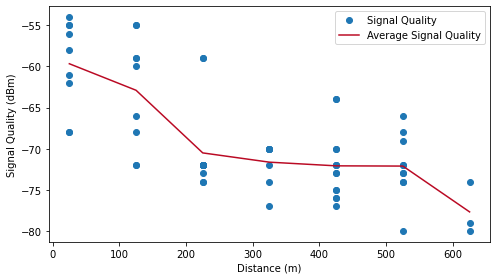

In [2]:
distance = data['Testtag']
signal_quality = data['Signalstärke']
latency = data['TWAMP AvgLat']

df_mean = data.groupby('Testtag').mean()
distance_m = df_mean.index
signal_quality_m = df_mean['Signalstärke']
latency_m = df_mean['TWAMP AvgLat']

fig, ax1 = plt.subplots(figsize=(7, 4))

ax1.plot(distance, signal_quality, marker='o', color=colors[0], linestyle='None', label="Signal Quality")
ax1.set_xlabel('Distance (m)')
ax1.set_ylabel('Signal Quality (dBm)')

#ax1.legend(['Signal Quality'], loc='upper left', bbox_to_anchor=(0, 1.15))

fig.tight_layout()
#fig.savefig('o-all-sig-qual--distance.pdf', format='pdf')

#plt.show()

#-------

#fig2, ax2 = plt.subplots()

ax1.plot(distance_m, signal_quality_m, color=colors[1], linestyle='-', label="Average Signal Quality")
#ax2.set_xlabel('Distance (m)')
#ax2.set_ylabel('Average Signal Quality (dBm)')

#ax2.legend(['Signal Quality'], loc='upper left', bbox_to_anchor=(0, 1.15))

ax1.legend()
ax1.legend(loc='upper right')

fig.tight_layout()
fig.savefig(r'Graphics/ol-all-mean-sig-qual--distance.pdf', format='pdf')

plt.show()

#print(signal_quality_m)

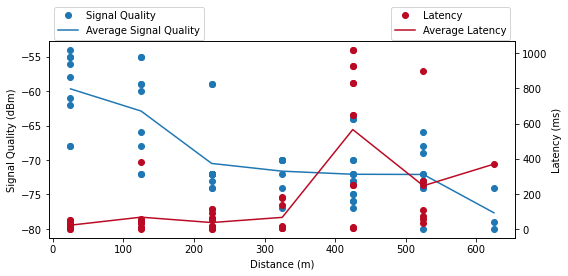

In [3]:
fig, ax1 = plt.subplots(figsize=(8, 4))

ax1.plot(distance, signal_quality, marker='o', color=colors[0], linestyle='None', label='Signal Quality')
ax1.set_xlabel('Distance (m)')
ax1.set_ylabel('Signal Quality (dBm)')

ax1.plot(distance_m, signal_quality_m, color=colors[0], linestyle='-', label='Average Signal Quality')

ax2 = ax1.twinx()

ax2.plot(distance, latency, color=colors[1], marker='o', linestyle='None', label='Latency')

ax2.plot(distance_m, latency_m, color=colors[1], linestyle='-', label='Average Latency')
ax2.set_ylabel('Latency (ms)')

ax1.legend()
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1.2))
ax2.legend()
ax2.legend(loc='upper right', bbox_to_anchor=(1.0, 1.2))

fig.tight_layout()
fig.savefig(r'Graphics/ol-mean-all-sig-qual-x-latency--distance.pdf', format='pdf')

plt.show()

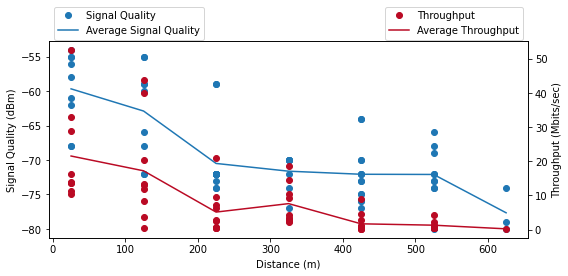

In [4]:
throughput_up = data['TCP Up']

distance = data['Testtag']
signal_quality = data['Signalstärke']
latency = data['TWAMP AvgLat']

df_mean = data.groupby('Testtag').mean()

distance_m = df_mean.index
signal_quality_m = df_mean['Signalstärke']
latency_m = df_mean['TWAMP AvgLat']

distance_m = df_mean.index
throughput_up_m = df_mean['TCP Up']

fig, ax1 = plt.subplots(figsize=(8, 4))

ax1.plot(distance, signal_quality, marker='o', color=colors[0], linestyle='None', label='Signal Quality')
ax1.set_xlabel('Distance (m)')
ax1.set_ylabel('Signal Quality (dBm)')

ax1.plot(distance_m, signal_quality_m, color=colors[0], linestyle='-', label='Average Signal Quality')

ax2 = ax1.twinx()

ax2.plot(distance, throughput_up, color=colors[1], marker='o', linestyle='None', label='Throughput')

ax2.plot(distance_m, throughput_up_m, color=colors[1], linestyle='-', label='Average Throughput')
ax2.set_ylabel('Throughput (Mbits/sec)')

ax1.legend()
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1.2))
ax2.legend()
ax2.legend(loc='upper right', bbox_to_anchor=(1.0, 1.2))

fig.tight_layout()
fig.savefig(r'Graphics/ol-mean-all-sig-qual-x-thgpt--distance.pdf', format='pdf')

plt.show()

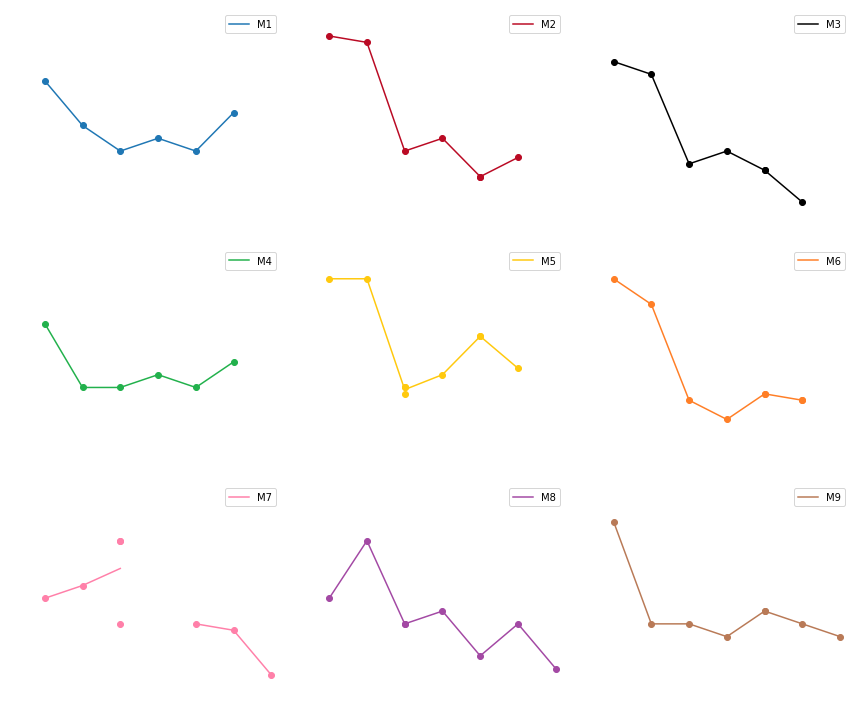

In [5]:
filtered_data = pd.DataFrame()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

for i in range(1, 10):
    for j in range(1, 10):
        
        measurement = f"M{j}{i}"
        
        filtered_data = filtered_data.append(data[data['Name'].str.contains(measurement)])
        
        if j == 9:
            
            row = (i - 1) // 3
            col = (i - 1) % 3

            ax = axes[row, col]
            
            df_mean = filtered_data.groupby('Testtag').mean()

            distance_m = df_mean.index
            sq_m = df_mean['Signalstärke']

            ax.plot(distance_m, sq_m, color=colors[i-1], linestyle='-', label='M' + str(i))
            ax.set_ylim(-82, -50) 

            ax.set_xlabel('')
            ax.set_ylabel('')
            ax.set_xlim(0, 650)

            ax.legend()
            
            filtered_data = filtered_data.append(data[data['Name'].str.contains(measurement)])

            distance_f = filtered_data['Testtag']
            sq_f = filtered_data['Signalstärke']
            
            ax.spines['bottom'].set_color('white')  
            ax.spines['left'].set_color('white')  
            ax.spines['top'].set_color('white')  
            ax.spines['right'].set_color('white') 
            
            ax.tick_params(axis='x', colors='white')
            ax.tick_params(axis='y', colors='white')

            ax.plot(distance_f, sq_f, marker='o', color=colors[i-1], linestyle='None')

            filtered_data = pd.DataFrame()

fig.tight_layout()

fig.savefig(r'Graphics/quad.png', format='png', dpi=400)

plt.show()

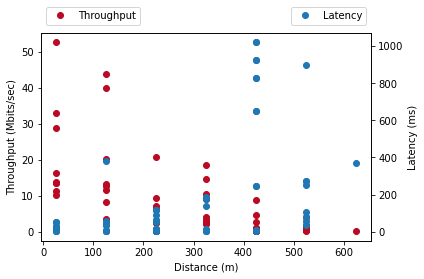

In [6]:
# Criar figura e eixos
fig, ax1 = plt.subplots()

# Plotar qualidade do sinal (eixo esquerdo)
ax1.plot(distance, throughput_up, marker='o', color=colors[1], linestyle='None')
ax1.set_xlabel('Distance (m)')
ax1.set_ylabel('Throughput (Mbits/sec)')

# Criar eixo secundário
ax2 = ax1.twinx()

# Plotar latência (eixo direito)
ax2.plot(distance, latency, color=colors[0], marker='o', linestyle='None')
ax2.set_ylabel('Latency (ms)')

# Personalizar legendas
ax1.legend(['Throughput'], loc='upper left', bbox_to_anchor=(0, 1.15))
ax2.legend(['Latency'], loc='upper right', bbox_to_anchor=(1, 1.15))

fig.tight_layout()
fig.savefig(r'Graphics/o-all-thgpt-x-latency--distance.pdf', format='pdf')

# Exibir o gráfico
plt.show()

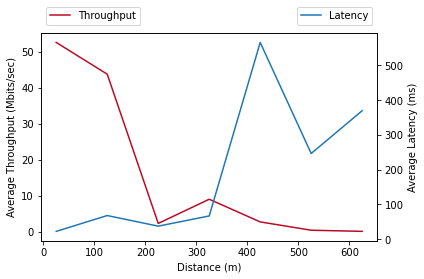

Testtag
25     52.600
125    43.800
225     2.410
325     9.120
425     2.830
525     0.524
625     0.210
Name: TCP Up, dtype: float64


In [7]:
distance_m = df_mean.index
throughput_up_m = df_mean['TCP Up']

# Criar figura e eixos
fig, ax1 = plt.subplots()

# Plotar qualidade do sinal (eixo esquerdo)
ax1.plot(distance_m, throughput_up_m, color=colors[1], linestyle='-')
ax1.set_xlabel('Distance (m)')
ax1.set_ylabel('Average Throughput (Mbits/sec)')

# Criar eixo secundário
ax2 = ax1.twinx()

# Plotar latência (eixo direito)
ax2.plot(distance_m, latency_m, color=colors[0], linestyle='-')
ax2.set_ylabel('Average Latency (ms)')

# Personalizar legendas
ax1.legend(['Throughput'], loc='upper left', bbox_to_anchor=(0, 1.15))
ax2.legend(['Latency'], loc='upper right', bbox_to_anchor=(1, 1.15))

fig.tight_layout()
fig.savefig(r'Graphics/mean-thgpt-x-latency--distance.pdf', format='pdf')

# Exibir o gráfico
plt.show()

print(throughput_up_m)

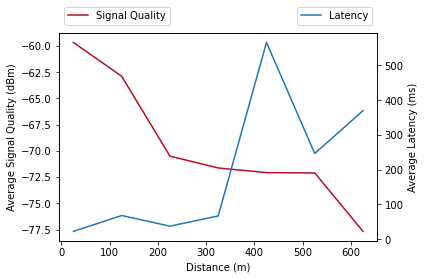

Testtag
25      22.447778
125     67.986667
225     37.408000
325     66.790000
425    566.123846
525    246.481250
625    369.750000
Name: TWAMP AvgLat, dtype: float64


In [8]:
df_mean = data.groupby('Testtag').mean()

distance_m = df_mean.index
signal_quality_m = df_mean['Signalstärke']
latency_m = df_mean['TWAMP AvgLat']

# Criar figura e eixos
fig, ax1 = plt.subplots()

# Plotar qualidade do sinal (eixo esquerdo)
ax1.plot(distance_m, signal_quality_m, color=colors[1], linestyle='-')
ax1.set_xlabel('Distance (m)')
ax1.set_ylabel('Average Signal Quality (dBm)')

# Criar eixo secundário
ax2 = ax1.twinx()

# Plotar latência (eixo direito)
ax2.plot(distance_m, latency_m, color=colors[0], linestyle='-')
ax2.set_ylabel('Average Latency (ms)')

# Personalizar legendas
ax1.legend(['Signal Quality'], loc='upper left', bbox_to_anchor=(0, 1.15))
ax2.legend(['Latency'], loc='upper right', bbox_to_anchor=(1, 1.15))

fig.tight_layout()
fig.savefig(r'Graphics/mean-sig-qual-x-latency--distance.pdf', format='pdf')

# Exibir o gráfico
plt.show()

print(latency_m)

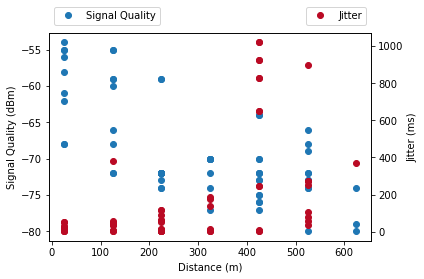

In [9]:
jitter = data['TWAMP StdDev']

# Criar figura e eixos
fig, ax1 = plt.subplots()

# Plotar qualidade do sinal (eixo esquerdo)
ax1.plot(distance, signal_quality, marker='o', color=colors[0], linestyle='None')
ax1.set_xlabel('Distance (m)')
ax1.set_ylabel('Signal Quality (dBm)')

# Criar eixo secundário
ax2 = ax1.twinx()

# Plotar latência (eixo direito)
ax2.plot(distance, latency, color=colors[1], marker='o', linestyle='None')
ax2.set_ylabel('Jitter (ms)')

# Personalizar legendas
ax1.legend(['Signal Quality'], loc='upper left', bbox_to_anchor=(0, 1.15))
ax2.legend(['Jitter'], loc='upper right', bbox_to_anchor=(1, 1.15))

fig.tight_layout()
fig.savefig(r'Graphics/o-all-sig-qual-x-jitter--distance.pdf', format='pdf')

# Exibir o gráfico
plt.show()


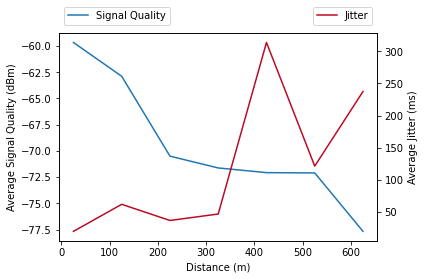

In [10]:
jitter_m = df_mean['TWAMP StdDev']

# Criar figura e eixos
fig, ax1 = plt.subplots()

# Plotar qualidade do sinal (eixo esquerdo)
ax1.plot(distance_m, signal_quality_m, color=colors[0], linestyle='-')
ax1.set_xlabel('Distance (m)')
ax1.set_ylabel('Average Signal Quality (dBm)')

# Criar eixo secundário
ax2 = ax1.twinx()

# Plotar latência (eixo direito)
ax2.plot(distance_m, jitter_m, color=colors[1], linestyle='-')
ax2.set_ylabel('Average Jitter (ms)')

# Personalizar legendas
ax1.legend(['Signal Quality'], loc='upper left', bbox_to_anchor=(0, 1.15))
ax2.legend(['Jitter'], loc='upper right', bbox_to_anchor=(1, 1.15))

fig.tight_layout()
fig.savefig(r'Graphics/mean-sig-qual-x-jitter--distance.pdf', format='pdf')

# Exibir o gráfico
plt.show()

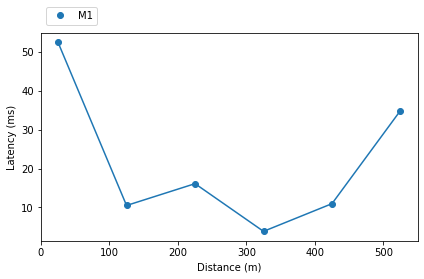

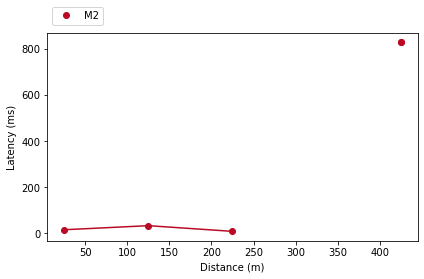

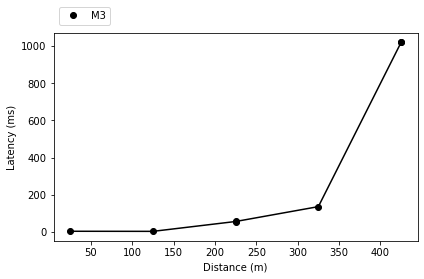

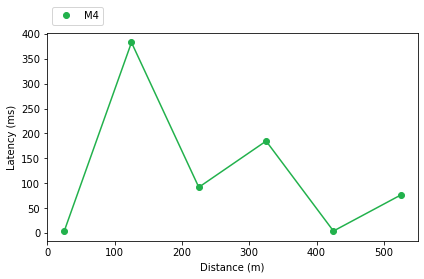

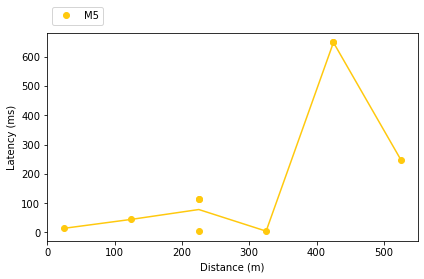

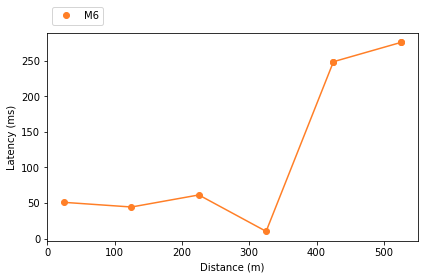

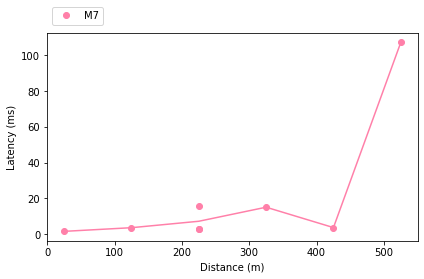

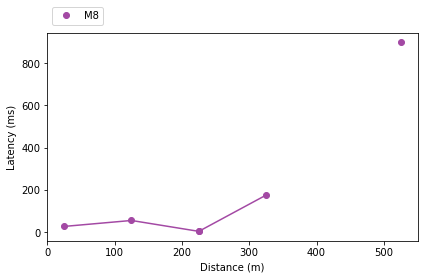

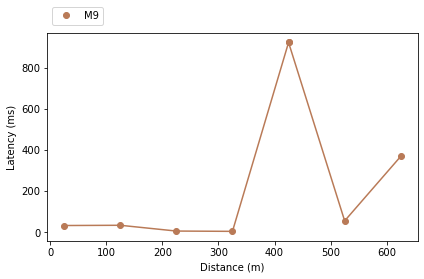

In [11]:
filtered_data = pd.DataFrame()
measurement_data = pd.DataFrame() 

for i in range(1, 10):
    for j in range(1, 10):
        
        measurement = f"M{j}{i}"
        
        filtered_data = filtered_data.append(data[data['Name'].str.contains(measurement)])
        #print("here ", filtered_data)

        distance_f = filtered_data['Testtag']
        avg_latency_f = filtered_data['TWAMP AvgLat']
        
        if j == 9:
            
            label_legend = "M" + str(i)
            
            fig, ax = plt.subplots()
            
            ax.plot(distance_f, avg_latency_f, marker='o', color=colors[i-1], linestyle='None')
            ax.set_xlabel('Distance (m)')
            ax.set_ylabel('Latency (ms)')
            #ax.set_title('Average Latency for M' + str(i) + ' Measurements')
            #ax.legend([label_legend], loc='upper left', bbox_to_anchor=(0, 1.15))

            #fig.tight_layout()
            #fig.savefig('o-all-M'+ str(i) +'-lat--distance.pdf', format='pdf')          
            
            #plt.show()
            
            
            df_mean = filtered_data.groupby('Testtag').mean()

            distance_m = df_mean.index
            latency_m = df_mean['TWAMP AvgLat']
            #print(df_mean)

            #fig1, ax1 = plt.subplots()

            ax.plot(distance_m, latency_m, color=colors[i-1], linestyle='-')
            #ax1.set_xlabel('Distance (m)')
            #ax1.set_ylabel('Average Latency (ms)')

            ax.legend([label_legend], loc='upper left', bbox_to_anchor=(0, 1.15))

            fig.tight_layout()
            fig.savefig(r'Graphics/ol-mean-M'+ str(i) +'-lat--distance.pdf', format='pdf')
  
            filtered_data = pd.DataFrame()
            
            plt.show()


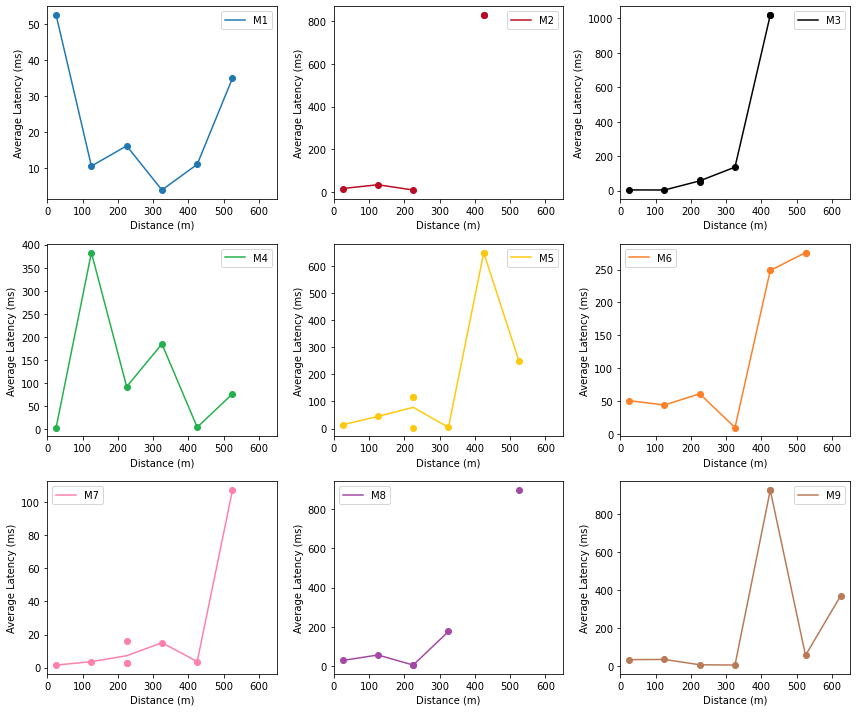

In [12]:
filtered_data = pd.DataFrame()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

for i in range(1, 10):
    for j in range(1, 10):
        
        measurement = f"M{j}{i}"
        
        filtered_data = filtered_data.append(data[data['Name'].str.contains(measurement)])
        
        if j == 9:
            
            row = (i - 1) // 3
            col = (i - 1) % 3

            ax = axes[row, col]
            
            df_mean = filtered_data.groupby('Testtag').mean()

            distance_m = df_mean.index
            latency_m = df_mean['TWAMP AvgLat']

            ax.plot(distance_m, latency_m, color=colors[i-1], linestyle='-', label='M' + str(i))

            ax.set_xlabel('Distance (m)')
            ax.set_ylabel('Average Latency (ms)')
            ax.set_xlim(0, 650)

            ax.legend()
            
            filtered_data = filtered_data.append(data[data['Name'].str.contains(measurement)])

            distance_f = filtered_data['Testtag']
            avg_latency_f = filtered_data['TWAMP AvgLat']

            ax.plot(distance_f, avg_latency_f, marker='o', color=colors[i-1], linestyle='None')

            filtered_data = pd.DataFrame()

fig.tight_layout()

fig.savefig(r'Graphics/ol-all-together-lat--distance.pdf', format='pdf')

plt.show()

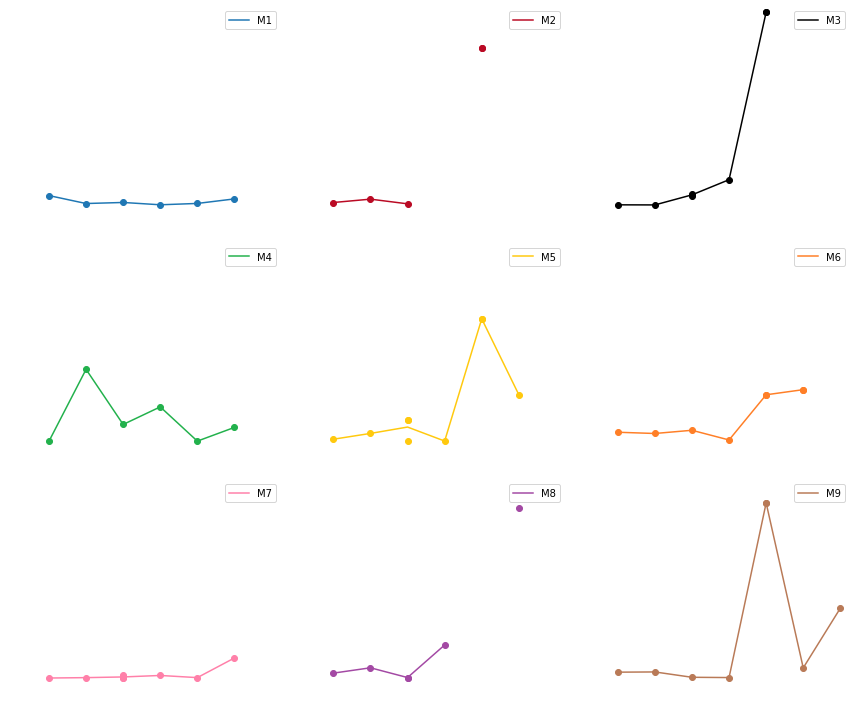

In [13]:
filtered_data = pd.DataFrame()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

for i in range(1, 10):
    for j in range(1, 10):
        
        measurement = f"M{j}{i}"
        
        filtered_data = filtered_data.append(data[data['Name'].str.contains(measurement)])
        
        if j == 9:
            
            row = (i - 1) // 3
            col = (i - 1) % 3

            ax = axes[row, col]
            
            df_mean = filtered_data.groupby('Testtag').mean()

            distance_m = df_mean.index
            latency_m = df_mean['TWAMP AvgLat']

            ax.plot(distance_m, latency_m, color=colors[i-1], linestyle='-', label='M' + str(i))

            ax.set_xlabel("") #('Distance (m)')
            ax.set_ylabel("") #('Average Latency (ms)')
            ax.set_xlim(0, 650)

            ax.legend()
            
            filtered_data = filtered_data.append(data[data['Name'].str.contains(measurement)])

            distance_f = filtered_data['Testtag']
            avg_latency_f = filtered_data['TWAMP AvgLat']

            ax.plot(distance_f, avg_latency_f, marker='o', color=colors[i-1], linestyle='None')
            ax.set_ylim(-50, 1050) 

            filtered_data = pd.DataFrame()
            
            ax.spines['bottom'].set_color('white')  
            ax.spines['left'].set_color('white')  
            ax.spines['top'].set_color('white') 
            ax.spines['right'].set_color('white')  

            ax.tick_params(axis='x', colors='white') 
            ax.tick_params(axis='y', colors='white')

fig.tight_layout()

#fig.savefig(r'Graphics/ol-all-together-lat--distance.png', format='png', dpi=400)

#plt.show()

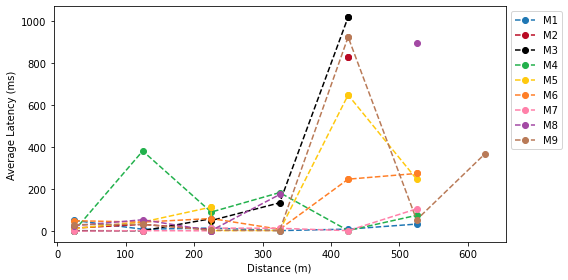

In [14]:
filtered_data = pd.DataFrame()

# Create the plot
fig, ax = plt.subplots(figsize=(8, 4))

for i in range(1, 10):
    for j in range(1, 10):
        
        measurement = f"M{j}{i}"

        filtered_data = filtered_data.append(data[data['Name'].str.contains(measurement)])

        distance_f = filtered_data['Testtag']
        avg_latency_f = filtered_data['TWAMP AvgLat']

        if j == 9:
            
            ax.plot(distance_f, avg_latency_f, color=colors[i-1], marker='o', linestyle='--', label='M' + str(i))

            filtered_data = pd.DataFrame()

ax.set_xlabel('Distance (m)')
ax.set_ylabel('Average Latency (ms)')
#ax.set_title('Average Latency for Measurements')

ax.legend()
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

fig.tight_layout()
fig.savefig(r'Graphics/o-all-lat--distance.pdf', format='pdf')

plt.show()
